<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
# column names
df.keys()

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
# State names
df['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

In [ ]:
# Date range
date_list = df['date'].unique()
print(f'From:\t{date_list[0]}\nTo:\t{date_list[-1]}')

From:	2020-01-21
To:	2022-01-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115631 entries, 0 to 2115630
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 96.8+ MB


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

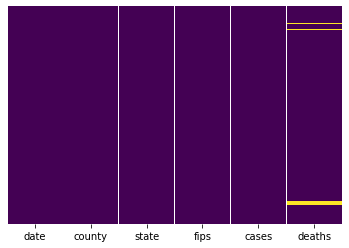

In [ ]:
# check for null values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

date      2115631
county    2115631
state     2115631
fips      2096093
cases     2115631
deaths    2067308
dtype: int64


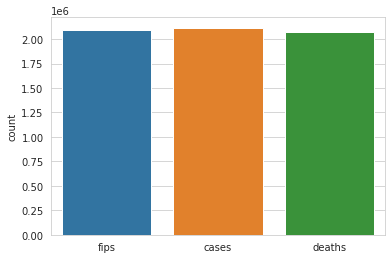

In [ ]:
# Check the count (shows the total number of UPDATES)
print(df.count())
sns.set_style('whitegrid')
sns.countplot(data=df)

In [3]:
# Fixing the date value from string to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date

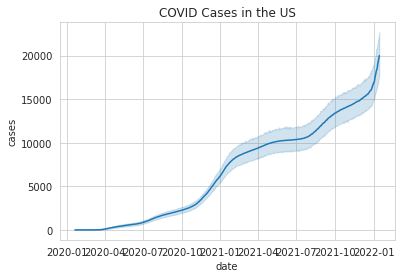

In [ ]:
plt.title('COVID Cases in the US')
sns.lineplot(data=df, x='date', y='cases')

In [ ]:
# Dataset for NY state
ny_df = df[df['state']=='New York']
ny_df.head()

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0


In [ ]:
# Dataset for Westchester, NY
westchester = ny_df[ny_df['county']=='Westchester']
westchester.head()

,date,county,state,fips,cases,deaths
519,2020-03-04,Westchester,New York,36119.0,9,0.0
566,2020-03-05,Westchester,New York,36119.0,17,0.0
629,2020-03-06,Westchester,New York,36119.0,33,0.0
718,2020-03-07,Westchester,New York,36119.0,69,0.0
825,2020-03-08,Westchester,New York,36119.0,81,0.0


In [ ]:
# Dataset for the last 30 days
westchester30 = westchester[westchester['date'] >= pd.to_datetime('2021-12-15')].reset_index(drop=True)
westchester30.head()

,date,county,state,fips,cases,deaths
0,2021-12-15,Westchester,New York,36119.0,153695,2366.0
1,2021-12-16,Westchester,New York,36119.0,154425,2367.0
2,2021-12-17,Westchester,New York,36119.0,155408,2369.0
3,2021-12-18,Westchester,New York,36119.0,156312,2370.0
4,2021-12-19,Westchester,New York,36119.0,157295,2370.0


# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
westchester30.describe()

,fips,cases,deaths
count,31.0,31.000000,31.000000
mean,36119.0,184197.709677,2412.419355
std,0.0,24799.899593,41.358412
min,36119.0,153695.000000,2366.000000
25%,36119.0,161354.500000,2376.500000
50%,36119.0,179079.000000,2399.000000
75%,36119.0,205064.000000,2440.000000
max,36119.0,227666.000000,2498.000000


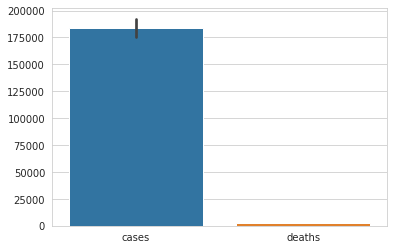

In [ ]:
sns.barplot(data=westchester30[['cases','deaths']])

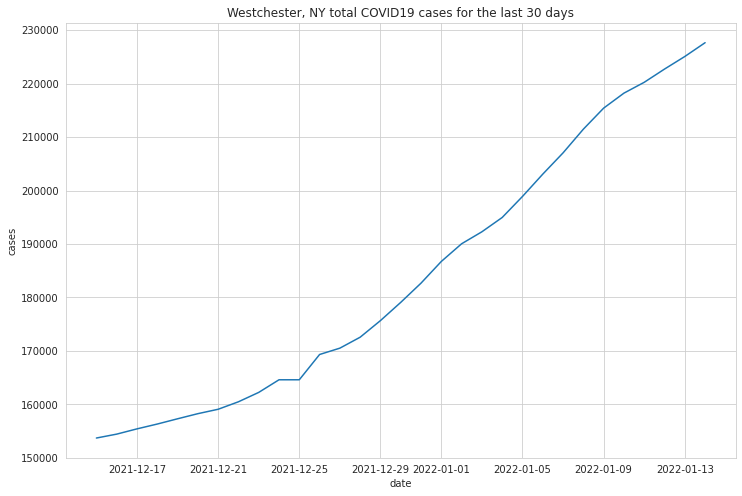

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Westchester, NY total COVID19 cases for the last 30 days')
sns.lineplot(data=westchester30, x='date', y='cases')

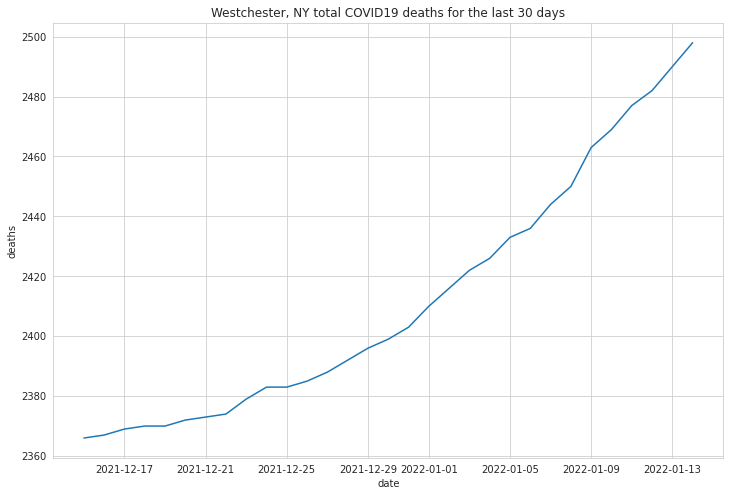

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Westchester, NY total COVID19 deaths for the last 30 days')
sns.lineplot(data=westchester30, x='date', y='deaths')

In [ ]:
# Getting the daily number of cases and deaths
daily_cases = []
daily_deaths = []
for i in range(30):
  daily_cases.append(westchester30['cases'].iloc[i+1] - westchester30['cases'].iloc[i])
  daily_deaths.append(westchester30['deaths'].iloc[i+1] - westchester30['deaths'].iloc[i])

In [ ]:
#creating a dataframe for new cases and new deaths
date = westchester30['date']
d = {'Daily Cases': daily_cases, 'Daily Deaths': daily_deaths}
daily_df = pd.DataFrame(d)
daily_df = pd.concat([date,daily_df], axis=1)
daily_df.dropna(inplace=True)
daily_df

,date,Daily Cases,Daily Deaths
0,2021-12-15,730.0,1.0
1,2021-12-16,983.0,2.0
2,2021-12-17,904.0,1.0
3,2021-12-18,983.0,0.0
4,2021-12-19,957.0,2.0
5,2021-12-20,825.0,1.0
6,2021-12-21,1400.0,1.0
7,2021-12-22,1755.0,5.0
8,2021-12-23,2363.0,4.0
9,2021-12-24,0.0,0.0


In [ ]:
# Number of Cases in Westchester, NY from the last 30 days
daily_df['Daily Cases'].sum()

73971.0

In [ ]:
# Number of Deaths in Westchester, NY from the last 30 days
daily_df['Daily Deaths'].sum()

132.0

In [ ]:
# Average number of daily cases in Westchester, NY
daily_df['Daily Cases'].mean()

2465.7

In [ ]:
# Average number of daily cases in Westchester, NY
daily_df['Daily Deaths'].mean()

4.4

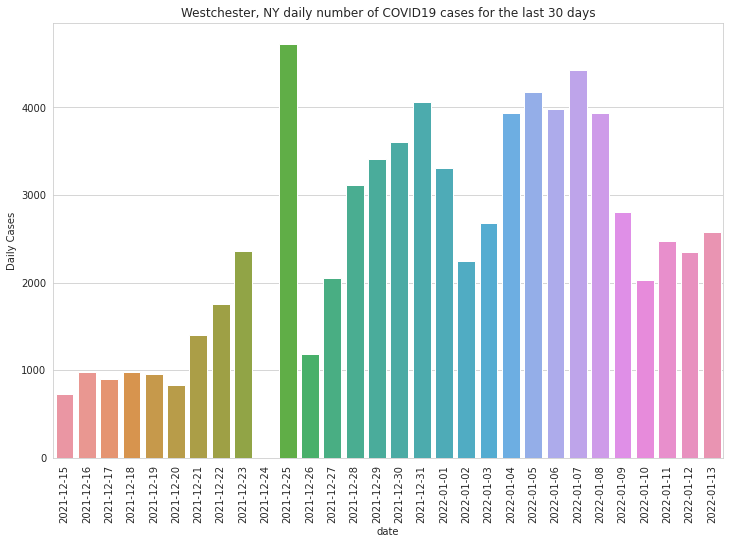

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Westchester, NY daily number of COVID19 cases for the last 30 days')
plt.xticks(rotation=90)
sns.barplot(data=daily_df, x='date', y='Daily Cases')

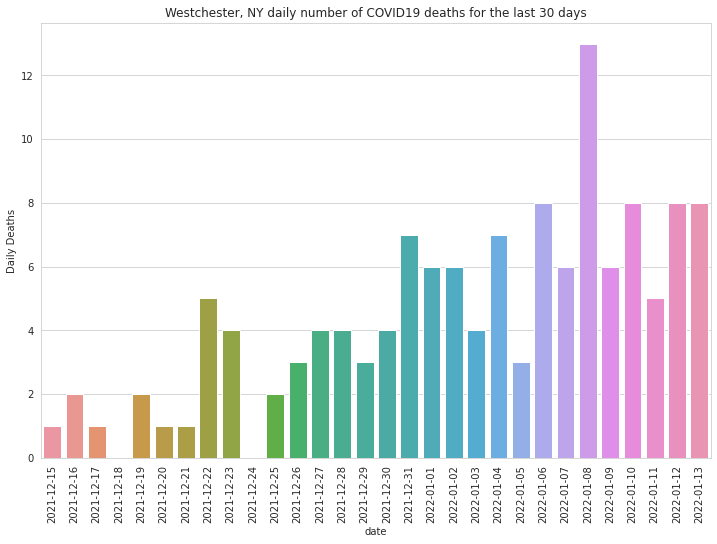

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Westchester, NY daily number of COVID19 deaths for the last 30 days')
plt.xticks(rotation=90)
sns.barplot(data=daily_df, x='date', y='Daily Deaths')

# Comparing Covid 19 data with different states

In [27]:
# Create a dataframe of states with max values for total number
df_state = df.groupby(['state']).max()
df_state.reset_index(inplace=True)
df_state.head()

,state,date,county,fips,cases,deaths
0,Alabama,2022-01-15,Winston,1133.0,145464,2034.0
1,Alaska,2022-01-15,Yukon-Koyukuk Census Area,2998.0,75309,426.0
2,American Samoa,2022-01-15,Unknown,NaN,1,0.0
3,Arizona,2022-01-15,Yuma,4027.0,1011221,14154.0
4,Arkansas,2022-01-15,Yell,5149.0,85555,990.0


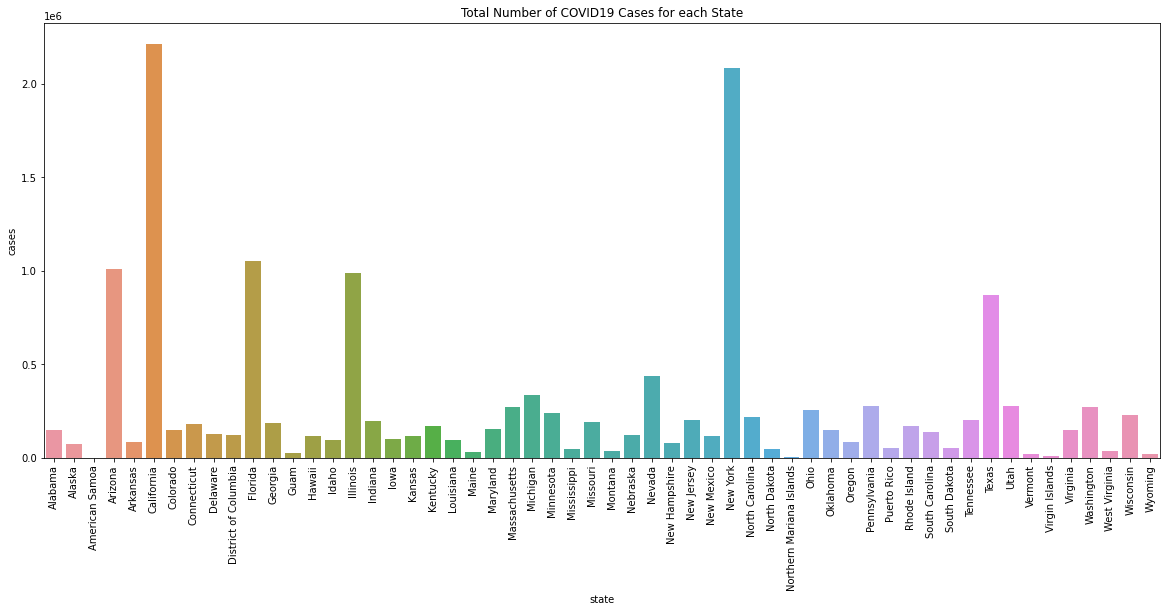

In [29]:
# plot for cases
plt.figure(figsize=(20,8))
plt.title('Total Number of COVID19 Cases for each State')
plt.xticks(rotation=90)
sns.barplot(data=df_state, x='state', y='cases')

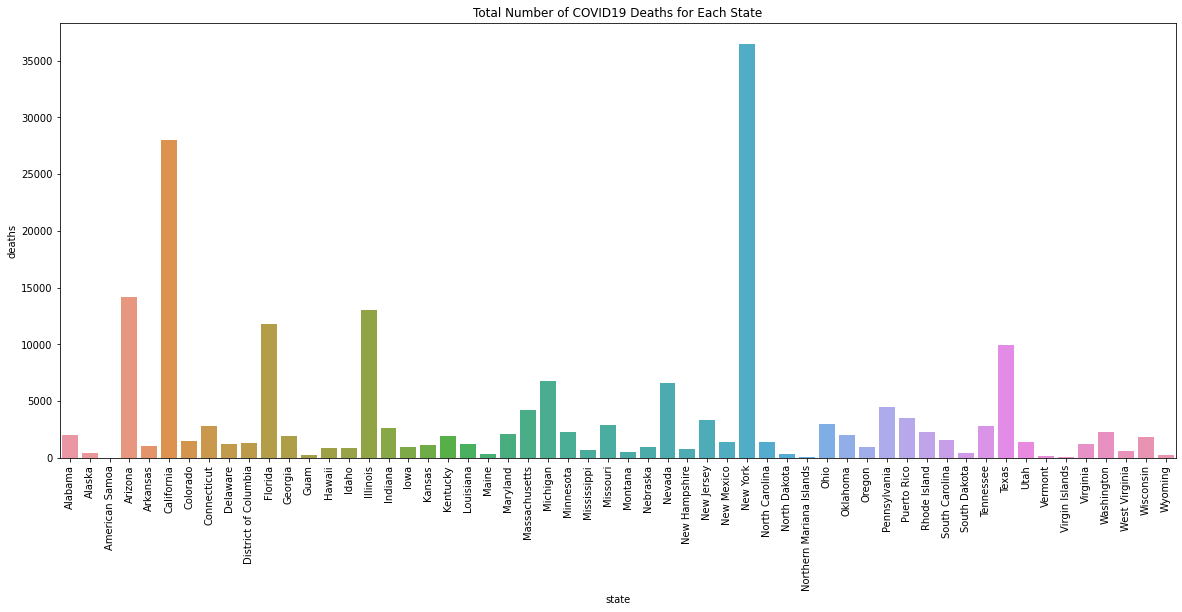

In [30]:
# plot for deaths
plt.figure(figsize=(20,8))
plt.title('Total Number of COVID19 Deaths for Each State')
plt.xticks(rotation=90)
sns.barplot(data=df_state, x='state', y='deaths')

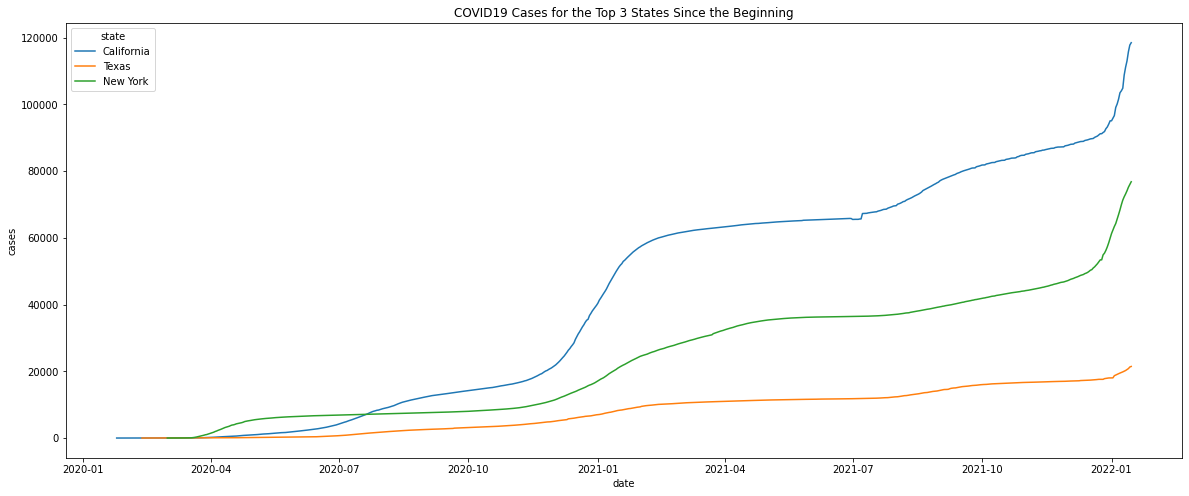

In [49]:
plt.figure(figsize=(20,8))
plt.title('COVID19 Cases for the Top 3 States Since the Beginning')
sns.lineplot(data=df[((df['state']=='New York') | (df['state']=='California') | (df['state']=='Texas'))], x='date', y='cases', hue='state', ci=None)

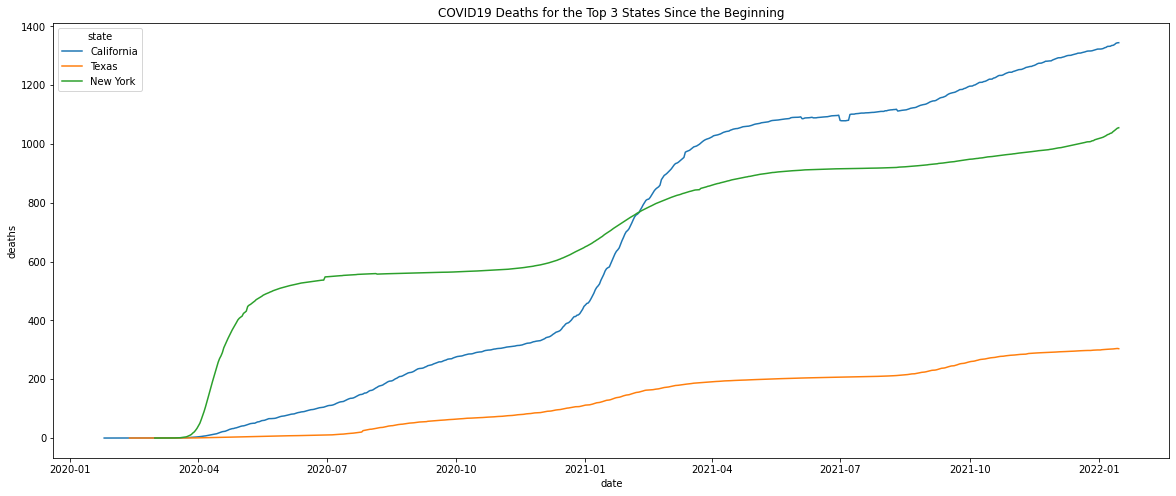

In [50]:
plt.figure(figsize=(20,8))
plt.title('COVID19 Deaths for the Top 3 States Since the Beginning')
sns.lineplot(data=df[((df['state']=='New York') | (df['state']=='California') | (df['state']=='Texas'))], x='date', y='deaths', hue='state', ci=None)

# Conclusion

Below are the conclusions:



1.   Conclusion 1

     For the last 30 days, the number of COVID19 cases in the Westchester County of New York increases almost linearly compared to an exponential increase from the whole country. However, the number of deaths has a higher increase since Christmas day. The city has about 2465 average daily cases and 4.4 deaths from the last 30 days. The increase is probably due to the new COVID19 variant that has been spreading throughout the country.
2.   Conclusion 2

     The number of cases and deaths are very high in California and New York state compared to the other states. We know that California has the highest population so having a high number of COVID19 cases and deaths is understandable. The New York state has higher number of cases compared to Texas and Florida, which have higher number of population, and The New York state has the highest number of COVID19 deaths. The people in state of New York should be wary about the numbers shown and maybe we should try to stay indoors until we see a decline from the number of daily COVID19 cases.

